# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

E-news Express is an online news portal with a goal of expanding its user base. The E-news Express Design team has created a new landing page in hopes of achieving a higher conversion rate than the existing landing page.  

The E-news Express Data Science team conducted a random sampling of 100 users dividing them equally into two groups: the control group which experiences the exisitng landing page, and the treatment group which experiences the new landing page. 

The below analysis is to determine if the new landing page is more effective at converting new users to subscribers. All of the statistical analysis included below has a significance level of 5%. 

Data Dictionary
The dataset contains the following categorical and continuous rows:

*   user_id: Unique ID of the user
*   group: identify if the user was part of the controll or treatment group.
*   landing_page: Indicates if the user experienced the new or old landing page.
*   time_spent_on_the_page
*   converted: refers to the users who visit the landing page and get converted
*   language_preferred


## Import all the necessary libraries

In [43]:
# Import libraries for data manipulation
import numpy as np
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import libraries for statistical analysis
import scipy.stats as stats

## Reading the Data into a DataFrame

In [44]:
# Read the data
data=pd.read_csv('abtest.csv')

# Copy the dataframe to prevent change to the original data
df=data.copy()


## Explore the dataset and extract insights using Exploratory Data Analysis

In [3]:
# Return the first 5 rows
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [4]:
# Check the shape of the data
print('There are', df.shape[0], 'rows and', df.shape[1], 'columns.')

There are 100 rows and 6 columns.


In [5]:
# Check for duplicates
print('There are', df.duplicated().sum(), 'duplicates in the dataset.')

There are 0 duplicates in the dataset.


In [6]:
# Check for missing values
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

There are no missing values in the dataset.
We can move forward assuming this dataset follows a normal distribution as the random sampling size remains greater than 30.

In [7]:
# Review a summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


Out of the 6 columns 2 are numerical and 4 columns are categorical.
This means our initial statistical analysis will be limited, and insight gained will be about the time spent on the page.

In [8]:
# Perform initial statistical analysis of dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,100.0,546517.0000,52.295779,546443.00,546467.75,546492.500,546567.2500,546592.00
time_spent_on_the_page,100.0,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71


The average time spent on E-news Express website is 5.38 minutes. 
The median time spent was 5.41 minutes. While th median is slighlty higher than the mean, this sample will still be considered a normal distribution.  


### Univariate Analysis

In [9]:
# Value counts for users
print("The number of users is")
print(df.user_id.value_counts())

The number of users is
546592    1
546590    1
546444    1
546452    1
546476    1
         ..
546464    1
546575    1
546471    1
546586    1
546483    1
Name: user_id, Length: 100, dtype: int64


There are 100 unique users in this sample.

In [10]:
# Value counts for group
print("The count in each test group is")
print(df.group.value_counts())

# Value counts for landing page
print("The number of users experiencing each landing page")
print(df.landing_page.value_counts())

The count in each test group is
control      50
treatment    50
Name: group, dtype: int64
The number of users experiencing each landing page
old    50
new    50
Name: landing_page, dtype: int64


The counts in the group and landing page column confirm the random sample was divided equally as indicated in the business case.

In [11]:
# Value counts for converted
df.converted.value_counts()

yes    54
no     46
Name: converted, dtype: int64

The conversion rates can be converted to the following proportions:
*   Converted proportion 54:100
*   Unconverted proportion 46:100

While the converted group is a larger proportion, there is still room for improvement as the business case indicates.

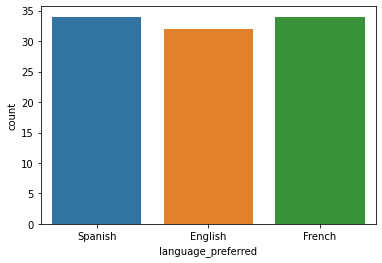

In [76]:
# Create a countplot with seaborn for the different languages
sns.countplot(data=df, x='language_preferred')
plt.show;

In [12]:
# Value counts for different languages
df.language_preferred.value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64


There is a fairly equal distribution between users preferring Spanish, English, and French languages.
Further analysis will be conducted to see if the language groups were evenly distributed through the control and treatment groups. 

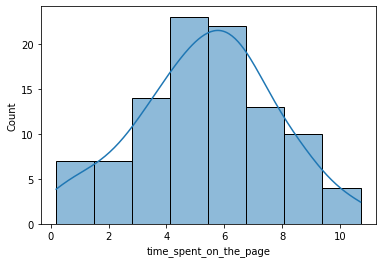

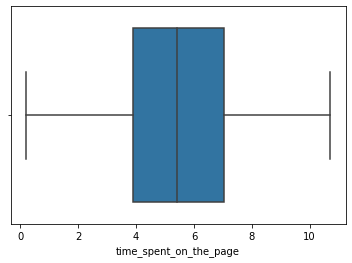

In [14]:
# Create a histplot with seaborn for time spent on the page
sns.histplot(df, x='time_spent_on_the_page', kde='True');
plt.show()

# Create a boxplot with seaborn for the time spent on the page
sns.boxplot(data=df, x='time_spent_on_the_page');
plt.show()

The time spent on the page is a normal distribution and does not show any outliers that would highly skew the data.
The innerquartile range indicates a majority of users spent between 3.88 to 7.02 minutes on the site.

### Bivariate Analysis

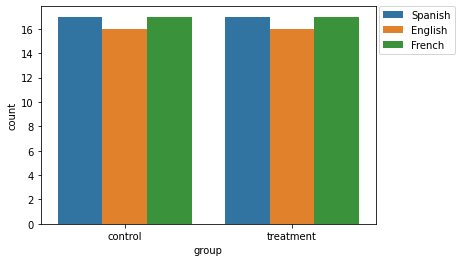

In [60]:
# Create a countplot using seaborn for the landing page and language preferred columns. 
sns.countplot(data=df, x='group', hue='language_preferred');
plt.legend(bbox_to_anchor=(1.01,1), loc='upper left', borderaxespad=0);

The control and treatment groups had an equal number of users for each language evaluated in the sample. This will be helpful insight when we determine if language preference has any impact on conversion rates. 

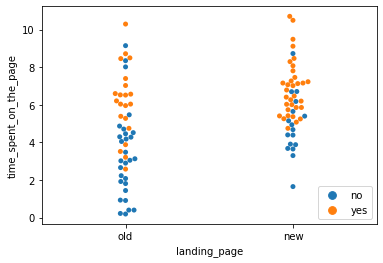

In [42]:
# Create a swarm plot using seaborn to compare the conversion rate to the time spent on the two types of landing pages
sns.swarmplot(data=df, x='landing_page', y='time_spent_on_the_page', hue='converted');
plt.legend(loc='lower right')
plt.show()


The points of this swarmplot show us each user's time on the page and if they converted or not. For both versions of the landing page we see that if users spend at least 5 minutes, they are likely to convert into subscribers. The new landing page is more successful at keeping users engaged for a longer time than the old landing page. 

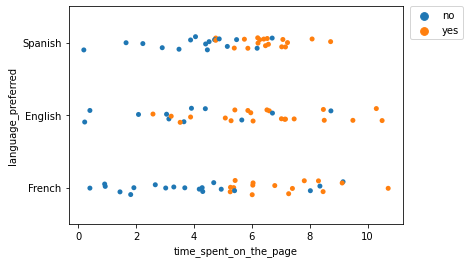

In [16]:
# Create a scatter chart using seaborn for the language preferred and converted columns.
sns.stripplot(data=df, x='time_spent_on_the_page', y='language_preferred', hue='converted');
plt.legend(bbox_to_anchor=(1.02,1), loc='upper left', borderaxespad=0)
plt.show()

We see across each language group, users who spend more than 5 minutes on the page are more likely to convert into subscribers. 

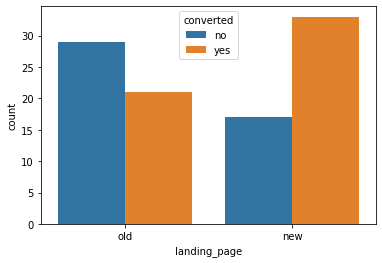

In [18]:
# Create a countplot comparing the conversion rate for each landing page
sns.countplot(data=df, x='landing_page', hue='converted');

This visualization indicates that in this sample dataset, the newer landing page has a higher conversion rate. We will need to test this hypothesis to see if it could be true for the population as well. 

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

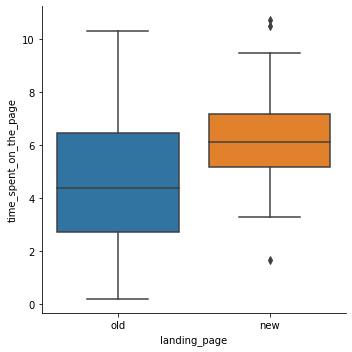

In [19]:
# Create a box plot to compare the time spent on each of the landing pages
sns.catplot(data=df, y='time_spent_on_the_page', x='landing_page', kind='box');
plt.show()

### Step 1: Define the null and alternate hypotheses

The null and alternative hypotheses can be formulated as: 

  $H_0$: The average time spent on the existing landing page and new landing page are equal.

  $H_a$: The average time spent on the new landing page is greater than the existing landing page. 

Alternatively, this can be formulated as:

  $H_0$: $μ_1$ = $μ_2$ 

  $H_a$: $μ_1$ <  $μ_2$

### Step 2: Select Appropriate test

The randomply sampled 100 users indicates this dataset follows a normal distribution. While the population standard deviation is unknown, the fact the sample deviations for the two samples are unequal indicate the population standard deviation is unequal as well. 

Based on these facts, the appropriate test would be a two sample t-test.

### Step 3: Decide the significance level

The business case included with this data set provides a a level of significance of .05.

### Step 4: Collect and prepare data

In [20]:
# Create new Series for time spent on the new landing page and old landing page
new_page_time=df[df['landing_page']=='new']['time_spent_on_the_page']
old_page_time=df[df['landing_page']=='old']['time_spent_on_the_page']

# Determine the sample standard deviation for the time spent on the new and old landing page
print('The sample standard deviation for the new page is:', round(new_page_time.std(),2))
print('The sample standard deviation for the old page is:', round(old_page_time.std(),2))

The sample standard deviation for the new page is: 1.82
The sample standard deviation for the old page is: 2.58


### Step 5: Calculate the p-value

In [21]:
# Import the function necessary to conduct a 2 Sample T-test for equality of means
from scipy.stats import ttest_ind

# Calculate the test statistic and p value using 2 sample independent t-test
test_stat, p_value=ttest_ind(new_page_time, old_page_time, equal_var=False, alternative='greater')
print(p_value)


0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [22]:
# Compare the p-value with level of significance to determine null hypothesis validity
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p_value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

The p-value is less than the level of significance which indicates the mean time spent on the new landing page is greater than that of the old landing page.

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

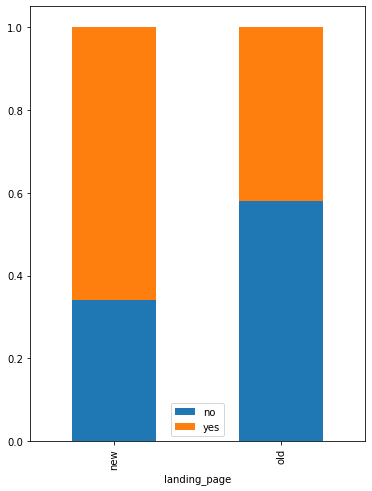

In [23]:
# Visualize the conversion rate for the new and old landing page
pd.crosstab(df['landing_page'],df['converted'],normalize='index').plot(kind="bar", figsize=(6,8),stacked=True)
plt.legend()
plt.show()

### Define the null and alternate hypotheses

The null and alternative hypotheses can be formulated as: 

$H_0$: The mean conversion rate for the old landing page and the new page are equal.  

$H_a$: The mean conversion rate for the new landing page is greater than the old landing page. 

Alternatively, this can be formulated as:

  $H_0$: $μ_1$ = $μ_2$ 

  $H_a$: $μ_1$ <  $μ_2$

### Select and Implement Appropriate Test

In [24]:
# Count the number of converted users for the treatment group
new_converted=df[df['group']=='treatment']['converted'].value_counts()['yes']
# Count the number of converted users for the control group
old_converted=df[df['group']=='control']['converted'].value_counts()['yes']
# Count the users in the control group
n_control=df.group.value_counts()['control']
# Count the users in the treatment group
n_treatment=df.group.value_counts()['treatment']

Since we are comparing the sample proportions for 2 populations it would be appropriate to use a 2 sample z-test for this question. As mentioned in the business case, the level of significance is .05.  

In [25]:
# Import the proportions z-test from statsmodels.stats
from statsmodels.stats.proportion import proportions_ztest
# Calculate the test statistic and p-value
test_stat2, p_value2=proportions_ztest([new_converted, old_converted],[n_treatment, n_control], alternative='larger')
print('The p-value is', p_value2)

The p-value is 0.008026308204056278


### Compare the p-value with $\alpha$ and draw inferences

In [26]:
# Compare the p-value with level of significance to determine null hypothesis validity
if p_value2 < 0.05:
    print(f'As the p-value {p_value2} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p_value {p_value2} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


As the null hypothesis is rejected, we can move forward assuming the alternative hypothesis is true. This means the conversion rate for the new landing page is higher than the previous page, and it is achieving it's goal.  We also see in the cross tabulation at the beginning of the question that the sample's new page conversion rate is greater than the old page.

## 3. Is the conversion and preferred language independent or related?

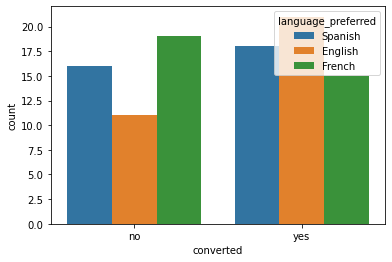

In [27]:
# Create a bar graph using seaborn for the language preferred and converted columns.
sns.countplot(data=df, x='converted', hue='language_preferred');
plt.show()

### Define the null and alternate hypotheses

The null and alternative hypotheses can be formulated as: 

$H_0$: The conversion rate and preferred language are independent.

$H_a$: The conversion rate and preferred language are dependent. 

### Select and Implement Appropriate Test

In [28]:
# Create a contingency table consisting of language and converted columns
contingency_table=pd.crosstab(df['language_preferred'], df['converted'])

contingency_table

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


As we are comparing two cagtegorical variables, and the value of each sample observation level is at least 5, it would be appropriate to use a Chi Square test to calculate the p-value. Once again the level of significance is .05. 

In [29]:
# Import the necessary function from scipy.stats library
from scipy.stats import chi2_contingency
# Test for the independence of language and conversion rates
chi2, p_value3, dof, exp_freq=chi2_contingency(contingency_table)
print("The p_value is,", p_value3)

The p_value is, 0.2129888748754345


### Compare the p-value with $\alpha$ and draw inferences

In [30]:
# Compare p-value with level of significance to test null hypothesis validity
if p_value3 < 0.05:
    print(f'As the p-value {p_value3} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p_value {p_value3} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p_value 0.2129888748754345 is greater than the level of significance, we fail to reject the null hypothesis.


The test failed to prove that user conversion was dependent on language preference. This could indicate that the page's translation efforts are not impacting conversion rates of new users. 

## 4. Is the time spent on the new page same for the different language users?

In [31]:
# Create a new dataframe with only the new landing page data
df_new=df[df['landing_page']=='new']

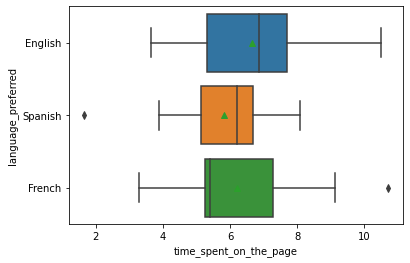

In [32]:
# Visualize each language groups' time on the new landing page
sns.boxplot(data=df_new, y='language_preferred', x='time_spent_on_the_page', showmeans=True);
plt.show()

In [33]:
# Calculate the mean time spent on the new page for each language
df_new.groupby(['language_preferred'])['time_spent_on_the_page'].mean()

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

### Define the null and alternate hypotheses

The null and alternative hypotheses can be formulated as: 

$H_0$: The mean time spent on the new page is equal across all languages. 

$H_a$: At least one of the languages has a different mean time spent on the new page than the other languages. 

### Select and Implement Appropriate Test

We are comparing the mean of 3 different variables, which will require us to use an ANOVA test. 

In [34]:
# Conduct the Shapiro-Wilks test to check for normal distribution
w, p_value4a=stats.shapiro(df_new['time_spent_on_the_page'])
print('The Shapiro-Wilks test p-value is', p_value4a)

The Shapiro-Wilks test p-value is 0.8040016293525696


In [35]:
# Conduct the Levene test to verify equality of variances
statistic, p_value4b=stats.levene(df_new[df_new['language_preferred']=='English']['time_spent_on_the_page'], 
                                  df_new[df_new['language_preferred']=='Spanish']['time_spent_on_the_page'], 
                                  df_new[df_new['language_preferred']=='French']['time_spent_on_the_page'])
print('The Levene test p-value is', p_value4b)

The Levene test p-value is 0.46711357711340173


The p-value for the Shapiro-Wilks test and the Leven test indicate we can move forward using the ANOVA method to answer this question. We will again use .05 as the level of significance. 

In [36]:
# Create separate variables to store time spent on the page in light of three preferred languages
time_spent_english=df_new[df_new['language_preferred']== 'English']['time_spent_on_the_page']
time_spent_spanish=df_new[df_new['language_preferred']== 'Spanish']['time_spent_on_the_page']
time_spent_french=df_new[df_new['language_preferred']== 'French']['time_spent_on_the_page']

In [37]:
# Import ANOVA function from scipy.stats library
from scipy.stats import f_oneway
# Find the p-value using the f-test
test_stat4, p_value4=f_oneway(time_spent_english, time_spent_spanish, time_spent_french)
print('The p-value is', p_value4)

The p-value is 0.43204138694325955


### Compare the p-value with $\alpha$ and draw inferences

In [38]:
# Compare p-value with level of significance to test null hypothesis validity
if p_value4 < 0.05:
    print(f'As the p-value {p_value4} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p_value {p_value4} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p_value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


When looking at the sample mean in this question, it could lead one to think there is variance in time spent on the new page for each languag group. However, this ANOVA test reult proves the same assumption cannot be made about the population. We cannot reject the null hypothesis that the average time spent on the site for each language group is the same. 

## Conclusion and Business Recommendations

#### Conclusions
The central question of this business case is the efficacy of the new landing page. This notebook confirms that the new landing page is achieving a higher conversion rate than the old webiste. Here are a couple of key observations on this point: 

* In the sample when users spend more than 5 minutes on the site, they will likely convert into subrscribers. 
* The new landing page has a higher average time spent on the page compared to the old site, which could be why the new page is achieving it's goal of increasing conversion rates. 
* While the initial EDA confirmed the sample had a higher conversion rate for the new website, our hythosesis test also confirmed the population will show the new landing page is out performing the existing landing page. 
* The hypothesis test and bivariate analysis also confirmed that language did not have an impact on conversion rates. This seems to indicate the translation team did an excellent job of making sure users had a similar user experiences across the different languages. 

#### Recommendations
* It would be wise to revisit another sample in upcoming months to see if there is any change in customer behavior. 
* At that time further analysis can be done on if there is a correlation between converted status and time spent on the page.
* In addition, further testing can be done to see if a user's preferred language has an impact on their time spent on the page. 

___